<a href="https://colab.research.google.com/github/whkaikai/AI/blob/main/%E9%87%8F%E5%AD%90%E9%97%A8%E7%9A%84%E5%8F%AF%E8%A7%86%E5%8C%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install strawberryfields --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 6.3 MB/s 
     |████████████████████████████████| 138 kB 58.3 MB/s 
     |████████████████████████████████| 83 kB 2.5 MB/s 
     |████████████████████████████████| 47 kB 5.1 MB/s 
     |████████████████████████████████| 112 kB 69.8 MB/s 
     |████████████████████████████████| 103 kB 56.0 MB/s 
     |████████████████████████████████| 127 kB 64.5 MB/s 
     |████████████████████████████████| 11.1 MB 39.3 MB/s 
     |████████████████████████████████| 87 kB 6.9 MB/s 
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141230 sha256=7cff4d0ed38948b7358049ef88787ac2be6081759906935a50e7d2e0935f5c17
  Stored in directory: /root/.cache/pip/wheels/ca/33/b7/336836125fc9bb4ceaa4376d8abca10ca8bc84ddc824baea6c
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115942 sha256=ff6e50a1387

In [2]:
import strawberryfields as sf
from strawberryfields.ops import *

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# q 代表一个量子模式，下面我们从电路的一个量子模式开始。
prog = sf.Program(1)

In [4]:
# We declare our quantum circuit using the engine. We can prepare the Vacuum state on one qumode using |.
with prog.context as q:
    Vac | q[0]

eng = sf.Engine('gaussian')
state = eng.run(prog).state

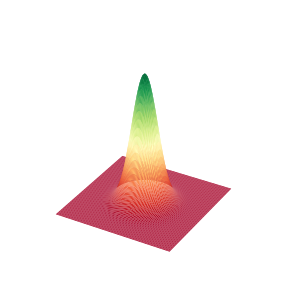

In [5]:
fig = plt.figure()
X = np.linspace(-5, 5, 100)
P = np.linspace(-5, 5, 100)
Z = state.wigner(0, X, P)
X, P = np.meshgrid(X, P)
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, P, Z, cmap="RdYlGn", lw=0.5, rstride=1, cstride=1)
fig.set_size_inches(4.8, 5)
ax.set_axis_off()

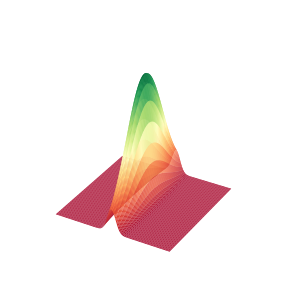

In [6]:
prog = sf.Program(1)
with prog.context as q:
    S = Sgate(1)
    S | q[0]


state = eng.run(prog).state
fig = plt.figure()
X = np.linspace(-5, 5, 100)
P = np.linspace(-5, 5, 100)
Z = state.wigner(0, X, P)
X, P = np.meshgrid(X, P)
ax = fig.add_subplot(111, projection="3d")
fig.set_size_inches(4.8, 5)
ax.plot_surface(X, P, Z, cmap="RdYlGn", lw=0.5, rstride=1, cstride=1)
ax.set_axis_off()

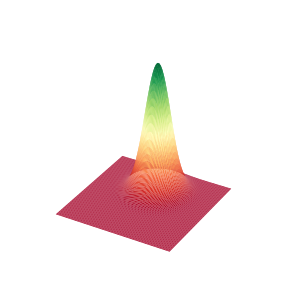

In [7]:
prog = sf.Program(1)
with prog.context as q:
    Dgate(1) | q[0]
    Rgate(np.pi/2) | q[0]

eng.reset()
state = eng.run(prog).state
fig = plt.figure()
X = np.linspace(-5, 5, 100)
P = np.linspace(-5, 5, 100)
Z = state.wigner(0, X, P)
X, P = np.meshgrid(X, P)
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, P, Z, cmap="RdYlGn", lw=0.5, rstride=1, cstride=1)
fig.set_size_inches(4.8, 5)
ax.set_axis_off()

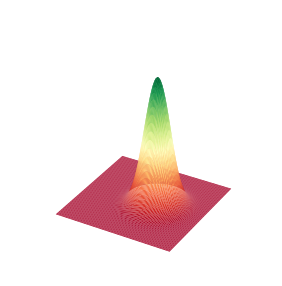

In [8]:
prog = sf.Program(1)
with prog.context as q:
    Dgate(0.55) | q[0]

eng.reset()
state = eng.run(prog).state
fig = plt.figure()
X = np.linspace(-5, 5, 100)
P = np.linspace(-5, 5, 100)
Z = state.wigner(0, X, P)
X, P = np.meshgrid(X, P)
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, P, Z, cmap="RdYlGn", lw=0.5, rstride=1, cstride=1)
fig.set_size_inches(4.8, 5)
ax.set_axis_off()

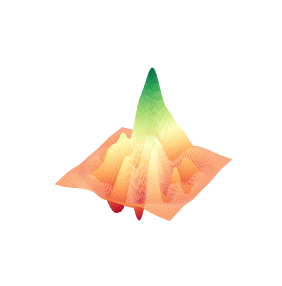

In [9]:
prog = sf.Program(1)
with prog.context as q:
    gamma = 2
    Vgate(gamma) | q[0]

#We use the fock backend and define the argument cutoff_dim
eng = sf.Engine('fock', backend_options={"cutoff_dim": 10})
state = eng.run(prog).state

fig = plt.figure()
X = np.linspace(-5, 5, 100)
P = np.linspace(-5, 5, 100)
Z = state.wigner(0, X, P)
X, P = np.meshgrid(X, P)
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, P, Z, cmap="RdYlGn", lw=0.5, rstride=1, cstride=1)
fig.set_size_inches(4.8, 5)
ax.set_axis_off()

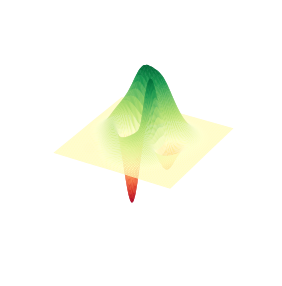

In [10]:
prog = sf.Program(1)
with prog.context as q:
    kappa = 1
    Dgate(1) | q[0]
    Kgate(kappa) | q[0]

eng.reset()
state = eng.run(prog).state

fig = plt.figure()
X = np.linspace(-5, 5, 100)
P = np.linspace(-5, 5, 100)
Z = state.wigner(0, X, P)
X, P = np.meshgrid(X, P)
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, P, Z, cmap="RdYlGn", lw=0.5, rstride=1, cstride=1)
fig.set_size_inches(4.8, 5)
ax.set_axis_off()